In [1]:
import subprocess
import os,sys
import matplotlib.pyplot as plt

In [8]:
def find_acc(filename):
    acc = []  
    grep = subprocess.Popen(
    ["grep", "Validation accuracy" ,filename],
    stdout=subprocess.PIPE,
    )

    awk = subprocess.Popen(
    ["awk" ,"-F" ,"Validation accuracy: ", "{print $2}"],
    stdin=grep.stdout,
    stdout=subprocess.PIPE,
    )

    for line in awk.stdout:
      acc.append(float(line.decode('utf-8').replace('\n','')))
#       acc.append(line)
    return acc

def find_train_acc(filename):
    acc = []  
    grep = subprocess.Popen(
    ["grep", "acc:" ,filename],
    stdout=subprocess.PIPE,
    )

    awk = subprocess.Popen(
    ["awk" ,"-F" ,"acc: ", "{print $2}"],
    stdin=grep.stdout,
    stdout=subprocess.PIPE,
    )

    awk2 = subprocess.Popen(
    ["awk" ,"-F" ,";", "{print $1}"],
    stdin=awk.stdout,
    stdout=subprocess.PIPE,
    )

    for line in awk2.stdout:
      acc.append(float(line.decode('utf-8').replace('\n','')))
    return acc


In [14]:
def plot_valid(num, title):
    Task1_seq = find_acc("Task"+num+"_Seq/logs")
    Task1_trans = find_acc("Task"+num+"_Trans/logs_newcode")
    Task1_our = find_acc("Task"+num+"_Our/logs_newcode")
    Task1_dfs = find_acc("Task"+num+"_DFS/logs_newcode")
    Task1_seq_brac = find_acc("Task"+num+"_Seq_Tree/logs_newcode")
    Task1_trans_brac = find_acc("Task"+num+"_Trans_Tree/logs_newcode")
#     Task1_jgorn = find_acc("Task"+num+"_m7/logs_newcode")
#     Task1_pe_gpe3 = find_acc("Task"+num+"_m7/logs_newcode_cat")
#     Task1_pe_gpe = find_acc("Task"+num+"_m7/logs_newcode_cat_0.5")
    lis = [len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac)]
#     lis = [len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac), len(Task1_jgorn)]
#     lis = [len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac)]
    minAcross_S_T_O_D = np.min(lis)
    print(lis)

    x = list(range(1, minAcross_S_T_O_D+1))
    plt.plot([100*i for i in x], Task1_seq[:minAcross_S_T_O_D],  label="SEQ: Seq")
    plt.plot([100*i for i in x], Task1_trans[:minAcross_S_T_O_D], label="SEQ: Trans")
    plt.plot([100*i for i in x], Task1_our[:minAcross_S_T_O_D], label="SEQ: Trans+Gorn")
    plt.plot([100*i for i in x], Task1_seq_brac[:minAcross_S_T_O_D], '--',label="TREE: Seq")
    plt.plot([100*i for i in x], Task1_trans_brac[:minAcross_S_T_O_D], '--',label="TREE: Trans")
    plt.plot([100*i for i in x], Task1_dfs[:minAcross_S_T_O_D], '--',label="TREE: Trans+Gorn+DFS")
#     plt.plot([100*i for i in x], Task1_jgorn[:minAcross_S_T_O_D], '--',label="TREE: Trans+ Just Gorn+DFS")
#     plt.plot([100*i for i in x], Task1_pe_gpe3[:minAcross_S_T_O_D], '.-',label="TREE: Trans+PE GPE+DFS")
#     plt.plot([100*i for i in x], Task1_pe_gpe[:minAcross_S_T_O_D], '.-',label="TREE: Trans+PE GPE+DFS+0.5")

    plt.xlabel('Steps sampled every 100 steps')
    plt.ylabel('Validation Accuracy')
    plt.title(title)
    plt.tight_layout()
    plt.legend(loc='lower right')
    
def plot_train(num, title):
    Task1_seq = find_train_acc("Task"+num+"_Seq/logs")
    Task1_trans = find_train_acc("Task"+num+"_Trans/logs_newcode")
    Task1_our = find_train_acc("Task"+num+"_Our/logs_newcode")
    Task1_dfs = find_train_acc("Task"+num+"_DFS/logs_newcode")
    Task1_seq_brac = find_train_acc("Task"+num+"_Seq_Tree/logs_newcode")
    Task1_trans_brac = find_train_acc("Task"+num+"_Trans_Tree/logs_newcode")
#     Task1_jgorn = find_train_acc("Task"+num+"_m7/logs_newcode")
#     Task1_pe_gpe3 = find_train_acc("Task"+num+"_m7/logs_newcode_cat")
#     Task1_pe_gpe = find_train_acc("Task"+num+"_m7/logs_newcode_cat_0.5")
    lis = [len(Task1_seq), len(Task1_trans),len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac)]
#     lis = [len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac), len(Task1_jgorn)]    
#     lis = [len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs), len(Task1_seq_brac), len(Task1_trans_brac)]
    minAcross_S_T_O_D = np.min(lis)
    print(lis)

    x = list(range(1, minAcross_S_T_O_D+1))
    plt.plot([50*i for i in x], Task1_seq[:minAcross_S_T_O_D],  label="SEQ: Seq")
    plt.plot([50*i for i in x], Task1_trans[:minAcross_S_T_O_D], label="SEQ: Trans")
    plt.plot([50*i for i in x], Task1_our[:minAcross_S_T_O_D], label="SEQ: Trans+Gorn")
    plt.plot([50*i for i in x], Task1_seq_brac[:minAcross_S_T_O_D], '--',label="TREE: Seq")
    plt.plot([50*i for i in x], Task1_trans_brac[:minAcross_S_T_O_D], '--',label="TREE: Trans")
    plt.plot([50*i for i in x], Task1_dfs[:minAcross_S_T_O_D], '--',label="TREE: Trans+Gorn+DFS")
#     plt.plot([50*i for i in x], Task1_jgorn[:minAcross_S_T_O_D], '--',label="TREE: Trans+Just Gorn+DFS")
#     plt.plot([50*i for i in x], Task1_pe_gpe3[:minAcross_S_T_O_D], '.-',label="TREE: Trans+PE GPE+DFS")
#     plt.plot([50*i for i in x], Task1_pe_gpe[:minAcross_S_T_O_D], '.-',label="TREE: Trans+PE GPE+DFS+0.5")
#     plt.xlabel('Steps sampled every 50 steps')
    plt.ylabel('Training Accuracy')
    plt.title(title)
    plt.tight_layout()
    plt.legend(loc='lower right')
    plt.savefig(title + '.png')
    
    

[652, 351, 620, 583, 546, 527]
[1305, 702, 1241, 1166, 1094, 1054]


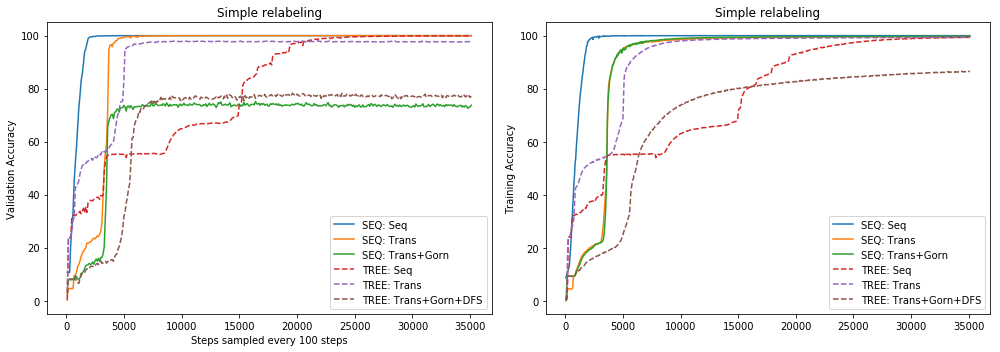

In [15]:
from pylab import *
f, axs = plt.subplots(1,2,figsize=(14,5))
subplot(1,2,1)
plot_valid(str(1), 'Simple relabeling')
subplot(1,2,2)
plot_train(str(1), 'Simple relabeling')

[1000, 461, 507, 607, 435, 506]
[2000, 924, 1014, 1214, 872, 1013]


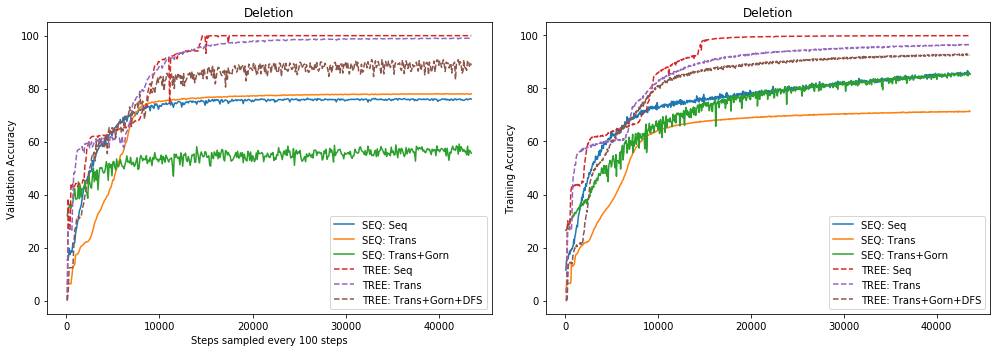

In [16]:
from pylab import *
f, axs = plt.subplots(1,2,figsize=(14,5))
subplot(1,2,1)
plot_valid(str(4), 'Deletion')
subplot(1,2,2)
plot_train(str(4), 'Deletion')

[772, 1000, 522, 548, 1000, 512]
[1544, 2000, 1045, 1096, 2000, 1025]
522


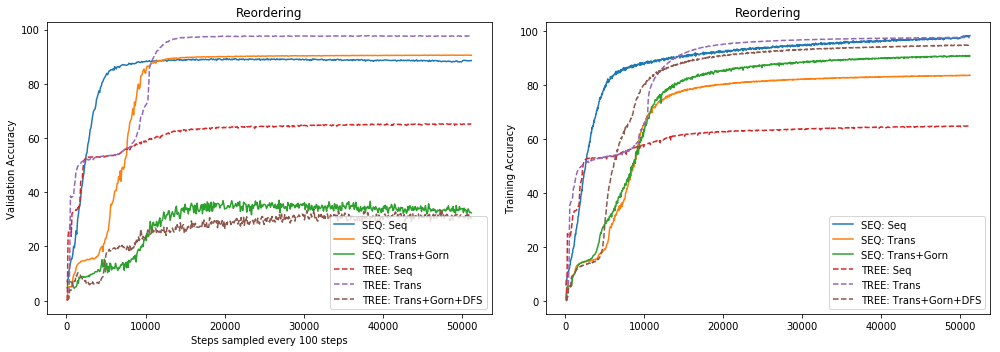

In [17]:
task = 'Reordering'
from pylab import *
f, axs = plt.subplots(1,2,figsize=(14,5))
subplot(1,2,1)
plot_valid(str(3), task)
subplot(1,2,2)
plot_train(str(3), task)
!grep "Validation accuracy:" Task3_Our/logs_newcode | wc -l

[485, 0, 0, 0, 0, 0]
[972, 0, 0, 0, 0, 0]


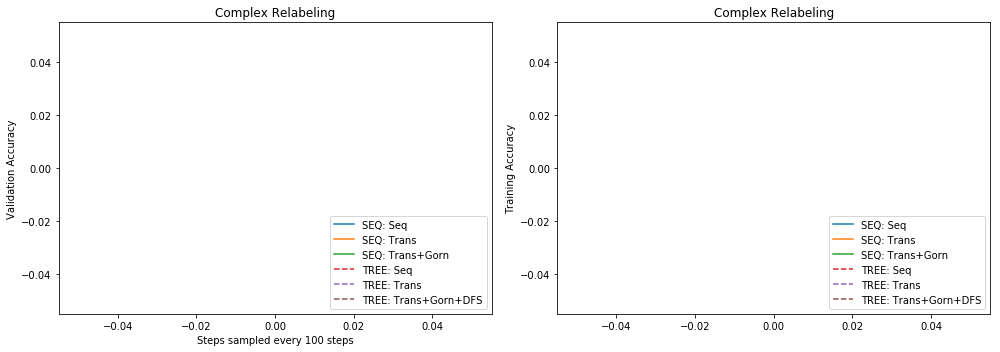

In [13]:
task = 'Complex Relabeling'
from pylab import *
f, axs = plt.subplots(1,2,figsize=(14,5))
subplot(1,2,1)
plot_valid(str(2), task)
subplot(1,2,2)
plot_train(str(2), task)

In [504]:
Task1_seq = find_acc("Task1_Seq/logs")
Task2_seq = find_acc("Task2_Seq/logs")
Task3_seq = find_acc("Task3_Seq/logs")
Task4_seq = find_acc("Task4_Seq/logs")
Task1_trans = find_acc("/home/djjindal/OpenNMT-py-tip/model_wo_emb_4_try2")
Task2_trans = find_acc("Task2_Trans/logs")
Task3_trans = find_acc("Task3_Trans/logs")
Task4_trans = find_acc("Task4_Trans/logs")
Task1_our = find_acc("Task1_Our/logs")
Task2_our = find_acc("Task2_Our/logs")
Task3_our = find_acc("Task3_Our/logs")
Task4_our = find_acc("Task4_Our/logs")
Task1_dfs = find_acc("Task1_DFS/logs")
Task2_dfs = find_acc("Task2_DFS/logs")
Task3_dfs = find_acc("Task3_DFS/logs")
Task4_dfs = find_acc("Task4_DFS/logs")


In [505]:
import numpy as np
minLenSeq = np.min([len(Task1_seq),len(Task2_seq),len(Task3_seq),len(Task4_seq)])
minLenTrans = np.min([len(Task1_trans),len(Task2_trans),len(Task3_trans),len(Task4_trans)])
minLenOur = np.min([len(Task1_our), len(Task2_our), len(Task3_our), len(Task4_our)])
minLenDFS = np.min([len(Task1_dfs), len(Task3_dfs), len(Task4_dfs)])
minAcross_S_T = np.min([minLenSeq, minLenTrans])
minAcross_S_T_O = np.min([minLenSeq, minLenTrans,minLenOur])
minAcross_S_T_O_D = np.min([minLenSeq, minLenTrans,minLenOur,minLenDFS])

In [506]:
print("Number of iterations")
print("Seq",[len(Task1_seq),len(Task2_seq),len(Task3_seq),len(Task4_seq)], minLenSeq)
print("Trans",[len(Task1_trans),len(Task2_trans),len(Task3_trans),len(Task4_trans)], minLenTrans)
print("Our",[len(Task1_our), len(Task2_our), len(Task3_our), len(Task4_our)], minLenOur)
print("DFS",[len(Task1_dfs), len(Task2_dfs), len(Task3_dfs), len(Task4_dfs)], minLenDFS)
print("Across_ST",minAcross_S_T)
print("Across_STO",minAcross_S_T_O)
print("Across_STOD",minAcross_S_T_O_D)

Number of iterations
Seq [652, 485, 772, 1000] 485
Trans [316, 799, 848, 1000] 316
Our [1000, 1000, 1000, 1000] 1000
DFS [1000, 1000, 1000, 1000] 1000
Across_ST 316
Across_STO 316
Across_STOD 316


# SEQ PLOT

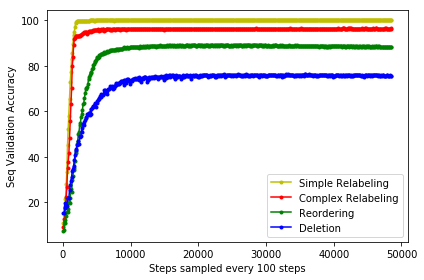

In [507]:
x = list(range(1, minLenSeq+1))
plt.plot([100*i for i in x], Task1_seq[:minLenSeq], label="Simple Relabeling", marker=".", color='y')
plt.plot([100*i for i in x], Task2_seq[:minLenSeq], label="Complex Relabeling", marker=".", color='r')
plt.plot([100*i for i in x], Task3_seq[:minLenSeq], label="Reordering", marker=".", color='g')
plt.plot([100*i for i in x], Task4_seq[:minLenSeq], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Seq Validation Accuracy')
plt.tight_layout()
plt.legend()


# TRANSFORMER PLOT


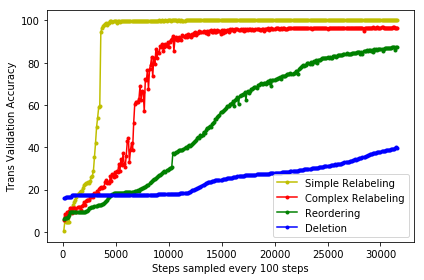

In [508]:
x = list(range(1, minLenTrans+1))
plt.plot([100*i for i in x], Task1_trans[:minLenTrans], label="Simple Relabeling", marker=".", color='y')
plt.plot([100*i for i in x], Task2_trans[:minLenTrans], label="Complex Relabeling", marker=".", color='r')
plt.plot([100*i for i in x], Task3_trans[:minLenTrans], label="Reordering", marker=".", color='g')
plt.plot([100*i for i in x], Task4_trans[:minLenTrans], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Trans Validation Accuracy')
plt.tight_layout()
plt.legend()

# OUR MODEL

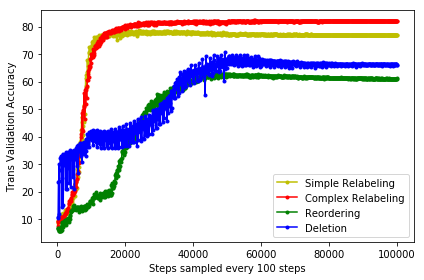

In [494]:
x = list(range(1, minLenOur+1))
plt.plot([100*i for i in x], Task1_our[:minLenOur], label="Simple Relabeling", marker=".", color='y')
plt.plot([100*i for i in x], Task2_our[:minLenOur], label="Complex Relabeling", marker=".", color='r')
plt.plot([100*i for i in x], Task3_our[:minLenOur], label="Reordering", marker=".", color='g')
plt.plot([100*i for i in x], Task4_our[:minLenOur], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Trans Validation Accuracy')
plt.tight_layout()
plt.legend()

# DFS Model

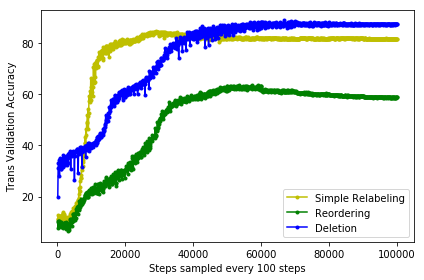

In [495]:
x = list(range(1, minLenDFS+1))
plt.plot([100*i for i in x], Task1_dfs[:minLenDFS], label="Simple Relabeling", marker=".", color='y')
# plt.plot([100*i for i in x], Task2_our[:minLenOur], label="Complex Relabeling", marker=".", color='r')
plt.plot([100*i for i in x], Task3_dfs[:minLenDFS], label="Reordering", marker=".", color='g')
plt.plot([100*i for i in x], Task4_dfs[:minLenDFS], label="Deletion", marker=".", color='b')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Trans Validation Accuracy')
plt.tight_layout()
plt.legend()

# SEQ AND TRANSFORMER PLOT

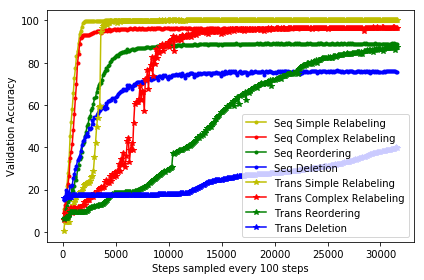

In [509]:
x = list(range(1, minAcross_S_T+1))
plt.plot([100*i for i in x], Task1_seq[:minAcross_S_T], label="Seq Simple Relabeling", marker=".", color='y')
plt.plot([100*i for i in x], Task2_seq[:minAcross_S_T], label="Seq Complex Relabeling", marker=".", color='r')
plt.plot([100*i for i in x], Task3_seq[:minAcross_S_T], label="Seq Reordering", marker=".", color='g')
plt.plot([100*i for i in x], Task4_seq[:minAcross_S_T], label="Seq Deletion", marker=".", color='b')
plt.plot([100*i for i in x], Task1_trans[:minAcross_S_T], label="Trans Simple Relabeling", marker="*", color='y')
plt.plot([100*i for i in x], Task2_trans[:minAcross_S_T], label="Trans Complex Relabeling", marker="*", color='r')
plt.plot([100*i for i in x], Task3_trans[:minAcross_S_T], label="Trans Reordering", marker="*", color='g')
plt.plot([100*i for i in x], Task4_trans[:minAcross_S_T], label="Trans Deletion", marker="*", color='b')
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Validation Accuracy')
plt.tight_layout()
plt.legend()

# SEQ AND TRANSFORMER AND OUR MODEL PLOT

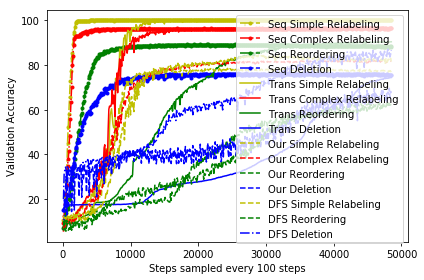

In [497]:
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([100*i for i in x], Task1_seq[:minAcross_S_T_O_D],  'y-..',label="Seq Simple Relabeling")
plt.plot([100*i for i in x], Task2_seq[:minAcross_S_T_O_D], 'r-..',label="Seq Complex Relabeling")
plt.plot([100*i for i in x], Task3_seq[:minAcross_S_T_O_D], 'g-..',label="Seq Reordering")
plt.plot([100*i for i in x], Task4_seq[:minAcross_S_T_O_D], 'b-..',label="Seq Deletion")
plt.plot([100*i for i in x], Task1_trans[:minAcross_S_T_O_D], 'y-',label="Trans Simple Relabeling")
plt.plot([100*i for i in x], Task2_trans[:minAcross_S_T_O_D], 'r-',label="Trans Complex Relabeling")
plt.plot([100*i for i in x], Task3_trans[:minAcross_S_T_O_D], 'g-',label="Trans Reordering")
plt.plot([100*i for i in x], Task4_trans[:minAcross_S_T_O_D], 'b-',label="Trans Deletion")
plt.plot([100*i for i in x], Task1_our[:minAcross_S_T_O_D], 'y--',label="Our Simple Relabeling")
plt.plot([100*i for i in x], Task2_our[:minAcross_S_T_O_D], 'r--',label="Our Complex Relabeling")
plt.plot([100*i for i in x], Task3_our[:minAcross_S_T_O_D], 'g--',label="Our Reordering")
plt.plot([100*i for i in x], Task4_our[:minAcross_S_T_O_D], 'b--',label="Our Deletion")
plt.plot([100*i for i in x], Task1_dfs[:minAcross_S_T_O_D], 'y--',label="DFS Simple Relabeling")
# plt.plot([100*i for i in x], Task2_our[:minAcross_S_T_O_D], 'r--',label="Our Complex Relabeling")
plt.plot([100*i for i in x], Task3_dfs[:minAcross_S_T_O_D], 'g--',label="DFS Reordering")
plt.plot([100*i for i in x], Task4_dfs[:minAcross_S_T_O_D], 'b-.',label="DFS Deletion")

plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Validation Accuracy')
plt.tight_layout()
plt.legend()

# Simple Relabeling

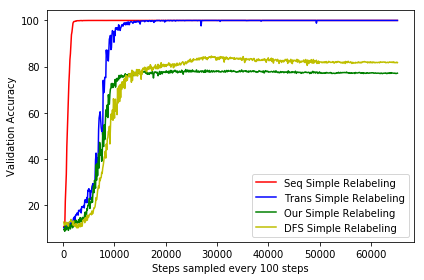

In [498]:
minAcross_S_T_O_D = np.min([len(Task1_seq), len(Task1_trans), len(Task1_our), len(Task1_dfs)])
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([100*i for i in x], Task1_seq[:minAcross_S_T_O_D],  'r-',label="Seq Simple Relabeling")
plt.plot([100*i for i in x], Task1_trans[:minAcross_S_T_O_D], 'b-',label="Trans Simple Relabeling")
plt.plot([100*i for i in x], Task1_our[:minAcross_S_T_O_D], 'g-',label="Our Simple Relabeling")
plt.plot([100*i for i in x], Task1_dfs[:minAcross_S_T_O_D], 'y-',label="DFS Simple Relabeling")
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Validation Accuracy')
plt.tight_layout()
plt.legend()

# Complex Relabeling

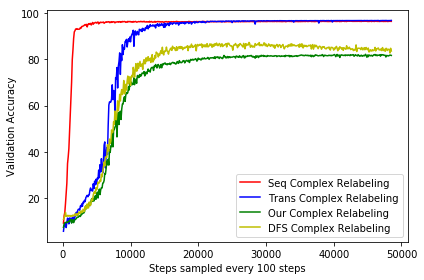

In [499]:
minAcross_S_T_O_D = np.min([len(Task2_seq), len(Task2_trans), len(Task2_our), len(Task2_dfs)])
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([100*i for i in x], Task2_seq[:minAcross_S_T_O_D],  'r-',label="Seq Complex Relabeling")
plt.plot([100*i for i in x], Task2_trans[:minAcross_S_T_O_D], 'b-',label="Trans Complex Relabeling")
plt.plot([100*i for i in x], Task2_our[:minAcross_S_T_O_D], 'g-',label="Our Complex Relabeling")
plt.plot([100*i for i in x], Task2_dfs[:minAcross_S_T_O_D], 'y-',label="DFS Complex Relabeling")
plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Validation Accuracy')
plt.tight_layout()
plt.legend()

# Deletion

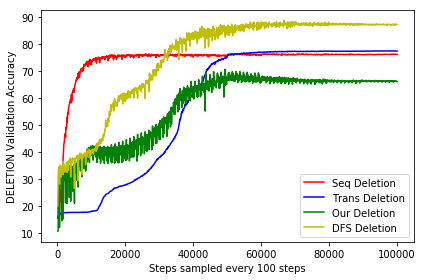

In [500]:
minAcross_S_T_O_D = np.min([len(Task4_seq), len(Task4_trans), len(Task4_our), len(Task4_dfs)])
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([100*i for i in x], Task4_seq[:minAcross_S_T_O_D], 'r-',label="Seq Deletion")
plt.plot([100*i for i in x], Task4_trans[:minAcross_S_T_O_D], 'b-',label="Trans Deletion")
plt.plot([100*i for i in x], Task4_our[:minAcross_S_T_O_D], 'g-',label="Our Deletion")
plt.plot([100*i for i in x], Task4_dfs[:minAcross_S_T_O_D], 'y-',label="DFS Deletion")

plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('DELETION Validation Accuracy')
plt.tight_layout()
plt.legend()

# Reordering

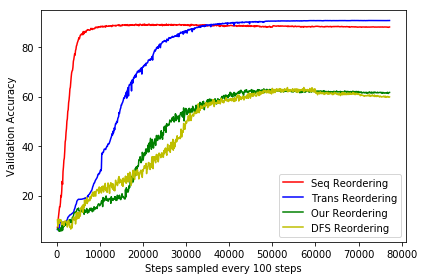

In [501]:
minAcross_S_T_O_D = np.min([len(Task3_seq), len(Task3_trans), len(Task3_our), len(Task3_dfs)])
x = list(range(1, minAcross_S_T_O_D+1))
plt.plot([100*i for i in x], Task3_seq[:minAcross_S_T_O_D], 'r-',label="Seq Reordering")
plt.plot([100*i for i in x], Task3_trans[:minAcross_S_T_O_D], 'b-',label="Trans Reordering")
plt.plot([100*i for i in x], Task3_our[:minAcross_S_T_O_D], 'g-',label="Our Reordering")
plt.plot([100*i for i in x], Task3_dfs[:minAcross_S_T_O_D], 'y-',label="DFS Reordering")


plt.xlabel('Steps sampled every 100 steps')
plt.ylabel('Validation Accuracy')
plt.tight_layout()
plt.legend()